<a href="https://colab.research.google.com/github/winnie9802/COMP6245/blob/main/labThree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

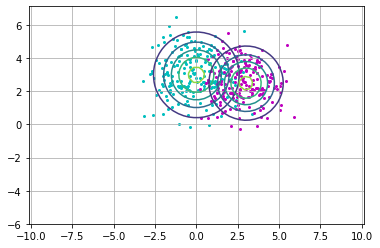

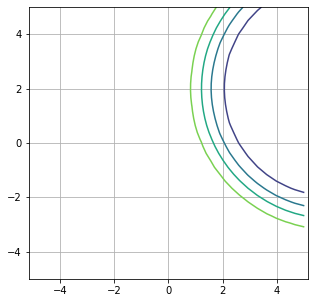

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def gauss2D(x, m, C):
  Ci = np.linalg.inv(C)  #求矩阵的逆
  dC = np.linalg.det(C)  #求矩阵的行列式
  num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci,(x-m))))
  den = 2 * np.pi * (dC**0.5) #计算矩阵的密度函数

  return num/den

def twoDGaussianPlot(nx, ny, m, C):
  x = np.linspace(-6, 6, nx)
  y = np.linspace(-6, 6, ny)
  X, Y = np.meshgrid(x, y, indexing='ij')

  Z = np.zeros([nx,ny])
  for i in range(nx):
    for j in range(ny):
      xvec = np.array([X[i,j], Y[i,j]])
      Z[i,j] = gauss2D(xvec, m, C)
  
  return X, Y, Z

def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
  x = np.linspace(-5, 5, nx) #生成x
  y = np.linspace(-5, 5, ny) #生成y
  X, Y = np.meshgrid(x, y, indexing='ij') 

  Z = np.zeros([nx, ny])
  for i in range(nx):
    for j in range(ny):
      xvec = np.array([X[i,j], Y[i,j]])
      num = P1*gauss2D(xvec,m1,C1)
      den = P1*gauss2D(xvec,m1,C1)+P2*gauss2D(xvec,m2,C2)
      Z[i,j] = num/den
  return X, Y, Z

#画第一个图
nx, ny = 40, 50
m1 = np.array([0,3]) #平均值是[0,2]
C1 = np.array([[2,0],[0,2]], np.float32) #C1是协方差矩阵
Xp1, Yp1, Zp1 = twoDGaussianPlot(nx, ny, m1, C1)

nx, ny = 40, 50
m2 = np.array([3,2.5]) #平均值是[0,2]
C2 = np.array([[1.5,0],[0,1.5]], np.float32) #C1是协方差矩阵
Xp2, Yp2, Zp2 = twoDGaussianPlot(nx, ny, m2, C2)
#等高线图
plt.contour(Xp1, Yp1, Zp1, 5)
plt.contour(Xp2, Yp2, Zp2, 5)
plt.axis("equal")

X = np.random.randn(200,2)

C = np.array([[2,0],[0,2]])
A = np.linalg.cholesky(C)

X = np.random.randn(200,2)
Y = X@A.T + m1

C2 = np.array([[1.5,0],[0,1.5]])
A2 = np.linalg.cholesky(C2) 

Y2 = X@A2.T + m2

plt.grid()
#散点图
plt.scatter(Y[:,0], Y[:,1], c="c", s=4)
plt.scatter(Y2[:,0], Y2[:,1], c="m", s=4)
plt.axis("equal")
plt.savefig('Example of probability densities and data1')
#画第二个图
fig, ax = plt.subplots(figsize=(5,5))
nx, ny = 30, 40
m1 = np.array([0,3])
m2 = np.array([3,2.5])
P1 = 0.5
P2 = 0.5
C1 = np.array([[2,0],[0,2]],np.float32)
C2 = np.array([[1,0],[0,1]],np.float32)
plt.grid()
Xp,Yp,Zp = posteriorPlot(nx,ny,m1,C1,m2,C2,P1,P2)
plt.axis("equal")
plt.contour(Xp,Yp,Zp,5)
plt.savefig('Example of contours on the posterior probability1')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
C = np.array([[2,1],[1,2]])
A = np.linalg.inv(C)
print(A)

[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]


[-1.08333333  0.66666667]


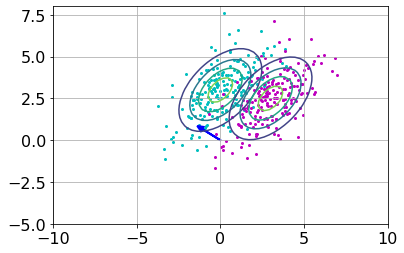

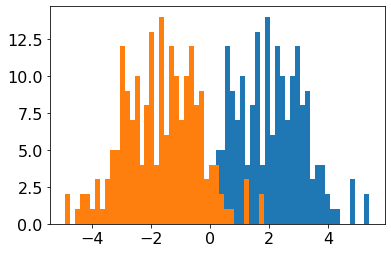

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def gauss2D(x, m, C):
  Ci = np.linalg.inv(C)  #求矩阵的逆
  dC = np.linalg.det(C)  #求矩阵的行列式
  num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci,(x-m))))
  den = 2 * np.pi * (dC**0.5) #计算矩阵的密度函数

  return num/den

def twoDGaussianPlot(nx, ny, m, C):
  x = np.linspace(-6, 6, nx)
  y = np.linspace(-6, 6, ny)
  X, Y = np.meshgrid(x, y, indexing='ij')

  Z = np.zeros([nx,ny])
  for i in range(nx):
    for j in range(ny):
      xvec = np.array([X[i,j], Y[i,j]])
      Z[i,j] = gauss2D(xvec, m, C)
  
  return X, Y, Z

X = np.random.randn(200, 2)
C1 = np.array([[2,1],[1,2]])
C2 = np.array([[2,1],[1,2]])
m1 = np.array([0, 3])
m2 = np.array([3,2.5])
A = np.linalg.cholesky(C1)

Y1 = X @ A.T + m1
Y2 = X @ A.T + m2

plt.figure(1)
plt.scatter(Y1[:,0], Y1[:,1], c='c', s=4)
plt.scatter(Y2[:,0], Y2[:,1], c='m', s=4)

Xp, Yp, Zp = twoDGaussianPlot(40,50,m1,C1)
plt.contour(Xp, Yp, Zp, 5)

Xp2, Yp2, Zp2 = twoDGaussianPlot(40,50,m2,C2)
plt.contour(Xp2, Yp2, Zp2, 5)

uF = np.linalg.inv(C1 + C2)@(m1-m2)
print(uF)
#ax.arrow(0, 0, *(uF*10), color='b', linewidth=2.0, head_width=0.20, head_length=0.25)
plt.arrow(0, 0, *(uF), color='b', linewidth=2.0, head_width=0.30, head_length=0.35)

plt.axis('equal')
plt.grid()
plt.xlim([-6,6])
plt.ylim([-5,8])

plt.savefig('density graph.png')

yp1 = Y1 @ uF
yp2 = Y2 @ uF

plt.figure(2)
plt.rcParams.update({'font.size':16})
plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)
plt.savefig('histogramprojections.png')


-5.667070702180544 5.950376292074316
-9660.75
[[ 99.5 100. ]
 [ 99.5 100. ]
 [ 99.5 100. ]
 [ 99.  100. ]
 [ 99.  100. ]
 [ 98.5 100. ]
 [ 97.5 100. ]
 [ 97.  100. ]
 [ 96.  100. ]
 [ 94.  100. ]
 [ 92.  100. ]
 [ 88.  100. ]
 [ 84.5 100. ]
 [ 79.5 100. ]
 [ 73.  100. ]
 [ 69.5 100. ]
 [ 62.   99.5]
 [ 55.5  99.5]
 [ 47.   99. ]
 [ 39.   99. ]
 [ 33.5  98.5]
 [ 27.5  97.5]
 [ 20.5  97. ]
 [ 15.   96. ]
 [ 11.5  94. ]
 [  9.   92. ]
 [  5.   88.5]
 [  4.5  84.5]
 [  3.   80. ]
 [  2.5  73. ]
 [  1.5  70. ]
 [  1.   63.5]
 [  0.5  56. ]
 [  0.5  49. ]
 [  0.   39. ]
 [  0.   33.5]
 [  0.   28.5]
 [  0.   22.5]
 [  0.   15.5]
 [  0.   12. ]
 [  0.    9. ]
 [  0.    5. ]
 [  0.    4.5]
 [  0.    3. ]
 [  0.    2.5]
 [  0.    1.5]
 [  0.    1. ]
 [  0.    0.5]
 [  0.    0.5]
 [  0.    0. ]]
[ 0.5  0.5  0.5  1.   1.   1.5  2.5  3.   4.   6.   8.  12.  15.5 20.5
 27.  30.5 37.5 44.  52.  60.  65.  70.  76.5 81.  82.5 83.  83.5 80.
 77.  70.5 68.5 62.5 55.5 48.5 39.  33.5 28.5 22.5 15.5 12.   

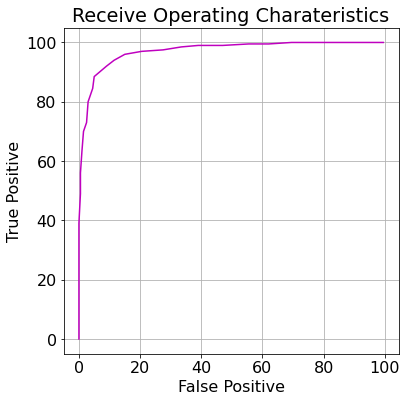

In [ ]:
pmin = np.min( np.array( (np.min(yp1), np.min(yp2) ))) 
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
print(pmin, pmax)

nRocPoints = 50
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros((nRocPoints, 2))

for i in range(len(thRange)):
  thresh = thRange[i]
  TP = len(yp2[yp2 > thresh]) * 100/len(yp2)
  FP = len(yp1[yp1 > thresh]) * 100/len(yp1)
  ROC[i,:] =[TP, FP]

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,0],ROC[:,1], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title("Receive Operating Charateristics")
ax.grid(True)
plt.savefig('rocCure.png')

print(np.trapz(ROC[:,1],x=ROC[:,0]))
print(ROC)
print(ROC[:,1]-ROC[:,0])

In [ ]:
import numpy as np
class Solution(object):
    def twoSum(self, nums, target):
      for i in range(len(nums)):
        if (target-nums[i]) in nums:
          j = i+1
          for j in range(j,len(nums)):
            if nums[i]+nums[j]==target:
              a = [i,j]
              return a
        
nums = [3,2,4]
s =  Solution();
s.twoSum( nums, 6)

[1, 2]

[-1  5]
(2,)
-9.86328367716107 29.105645660497466
-7403.875


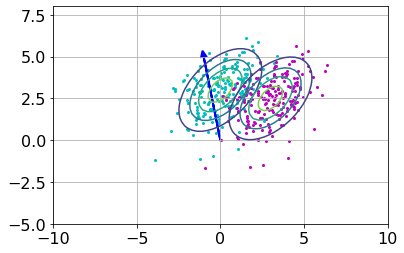

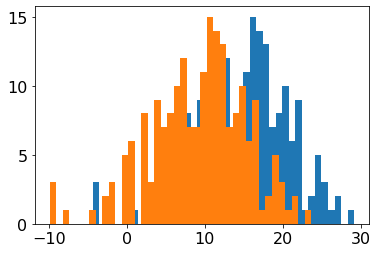

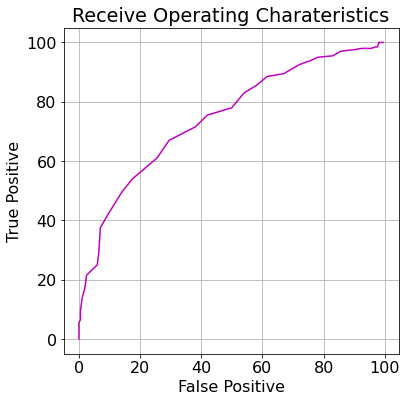

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def gauss2D(x, m, C):
  Ci = np.linalg.inv(C)  #求矩阵的逆
  dC = np.linalg.det(C)  #求矩阵的行列式
  num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci,(x-m))))
  den = 2 * np.pi * (dC**0.5) #计算矩阵的密度函数

  return num/den

def twoDGaussianPlot(nx, ny, m, C):
  x = np.linspace(-6, 6, nx)
  y = np.linspace(-6, 6, ny)
  X, Y = np.meshgrid(x, y, indexing='ij')

  Z = np.zeros([nx,ny])
  for i in range(nx):
    for j in range(ny):
      xvec = np.array([X[i,j], Y[i,j]])
      Z[i,j] = gauss2D(xvec, m, C)
  
  return X, Y, Z

X = np.random.randn(200, 2)
C1 = np.array([[2,1],[1,2]])
C2 = np.array([[2,1],[1,2]])
m1 = np.array([0, 3])
m2 = np.array([3,2.5])
A = np.linalg.cholesky(C1)

Y1 = X @ A.T + m1
Y2 = X @ A.T + m2

plt.figure(1)
plt.scatter(Y1[:,0], Y1[:,1], c='c', s=4)
plt.scatter(Y2[:,0], Y2[:,1], c='m', s=4)

Xp, Yp, Zp = twoDGaussianPlot(40,50,m1,C1)
plt.contour(Xp, Yp, Zp, 5)

Xp2, Yp2, Zp2 = twoDGaussianPlot(40,50,m2,C2)
plt.contour(Xp2, Yp2, Zp2, 5)

#uF = [(np.mean(Y1[:,0])+np.mean(Y2[:,0]))/2,(np.mean(Y1[:,1])+np.mean(Y2[:,1]))/2]
uF = np.array([-1,5])
#uF = np.array(m1-m2)
print(uF)
print(uF.shape)
#plt.arrow(0, 0, *(uF), color='b', linewidth=2.0, head_width=0.30, head_length=0.35)
plt.arrow(0, 0, uF[0], uF[1], color='b', linewidth=2.0, head_width=0.30, head_length=0.35)

plt.axis('equal')
plt.grid()
plt.xlim([-6,6])
plt.ylim([-5,8])

plt.savefig('density graph.png')

yp1 = Y1 @ uF
yp2 = Y2 @ uF

plt.figure(2)
plt.rcParams.update({'font.size':16})
plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)
plt.savefig('histogramprojections.png')

pmin = np.min( np.array( (np.min(yp1), np.min(yp2) ))) 
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
print(pmin, pmax)

nRocPoints = 50
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros((nRocPoints, 2))

for i in range(len(thRange)):
  thresh = thRange[i]
  TP = len(yp2[yp2 > thresh]) * 100/len(yp2)
  FP = len(yp1[yp1 > thresh]) * 100/len(yp1)
  ROC[i,:] =[TP, FP]

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,0],ROC[:,1], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title("Receive Operating Charateristics")
ax.grid(True)
plt.savefig('rocCure.png')

print(np.trapz(ROC[:,1],x=ROC[:,0]))


In [ ]:
import numpy as np
c = np.array([[2,0],[0,2]])
A = np.linalg.inv(c)
print(A)

[[0.5 0. ]
 [0.  0.5]]


actual_m1: [[0.01499354 2.94219094]] actual_m2: [[3.01499354 2.44219094]]
x: [[1.69075315 5.44583297]]
result_1: 3.0127053747863712
result_2: 3.282602331051178
result_3: [[1.81690118]]
result_4: [[3.28324255]]


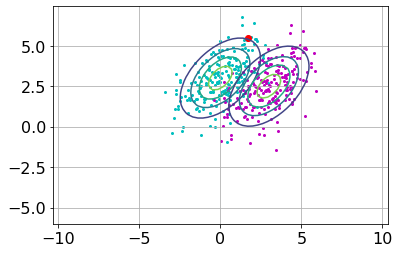

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt
import numpy as np

def gauss2D(x, m, C):
  Ci = np.linalg.inv(C)  #求矩阵的逆
  dC = np.linalg.det(C)  #求矩阵的行列式
  num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci,(x-m))))
  den = 2 * np.pi * (dC**0.5) #计算矩阵的密度函数

  return num/den

def twoDGaussianPlot(nx, ny, m, C):
  x = np.linspace(-6, 6, nx)
  y = np.linspace(-6, 6, ny)
  X, Y = np.meshgrid(x, y, indexing='ij')

  Z = np.zeros([nx,ny])
  for i in range(nx):
    for j in range(ny):
      xvec = np.array([X[i,j], Y[i,j]])
      Z[i,j] = gauss2D(xvec, m, C)
  
  return X, Y, Z

def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
  x = np.linspace(-25, 25, nx) #生成x
  y = np.linspace(-25, 25, ny) #生成y
  X, Y = np.meshgrid(x, y, indexing='ij') 

  Z = np.zeros([nx, ny])
  for i in range(nx):
    for j in range(ny):
      xvec = np.array([X[i,j], Y[i,j]])
      num = P1*gauss2D(xvec,m1,C1)
      den = P1*gauss2D(xvec,m1,C1)+P2*gauss2D(xvec,m2,C2)
      Z[i,j] = num/den
  return X, Y, Z

#画第一个图
nx, ny = 40, 50
m1 = np.array([0,3]) #平均值是[0,2]
C1 = np.array([[2,1],[1,2]], np.float32) #C1是协方差矩阵
Xp1, Yp1, Zp1 = twoDGaussianPlot(nx, ny, m1, C1)

nx, ny = 40, 50
m2 = np.array([3,2.5]) #平均值是[0,2]
C2 = np.array([[2,1],[1,2]], np.float32) #C1是协方差矩阵
Xp2, Yp2, Zp2 = twoDGaussianPlot(nx, ny, m2, C2)
#等高线图
plt.contour(Xp1, Yp1, Zp1, 5)
plt.contour(Xp2, Yp2, Zp2, 5)
plt.axis("equal")

X = np.random.randn(200,2)

C = np.array([[2,1],[1,2]])
A = np.linalg.cholesky(C)

X = np.random.randn(200,2)
Y = X@A.T + m1

C2 = np.array([[2,1],[1,2]])
A2 = np.linalg.cholesky(C2)

Y2 = X@A2.T + m2

plt.grid()
#散点图
plt.scatter(Y[:,0], Y[:,1], c="c", s=4)
plt.scatter(Y2[:,0], Y2[:,1], c="m", s=4)
plt.axis("equal")
plt.savefig('Example of probability densities and data1')





#plt.scatter(Y[:,0],Y[:,1],c='c',s=4)
#plt.scatter(Y2[:,0],Y2[:,1],c='m',s=4)

actual_m1 = np.array([[np.mean(Y[:,0]),np.mean(Y[:,1])]])
actual_m2 = np.array([[np.mean(Y2[:,0]),np.mean(Y2[:,1])]])
print("actual_m1:",actual_m1,"actual_m2:", actual_m2)
x = np.random.rand(1,2)*13
print("x:",x)
plt.scatter(x[0,0],x[0,1],c='r')

result_1 = np.sqrt(np.sum(np.square(x-actual_m1)))
print("result_1:",result_1)

result_2 = np.sqrt(np.sum(np.square(x-actual_m2)))
print("result_2:",result_2)
      
#Mahalanobis 
covar1 = np.cov(Y.T)
sigma1 = np.linalg.inv(covar1)
result_3 = np.sqrt((x-actual_m1) @ sigma1 @ (x-actual_m1).T)
print("result_3:",result_3)

covar2 = np.cov(Y2.T)
sigma2 = np.linalg.inv(covar2)
result_4 = np.sqrt((x-actual_m2) @ sigma2 @ (x-actual_m2).T)
print("result_4:",result_4)

plt.savefig('compare the difference')